# From Vaidya's paper of 1950 - which uses traditional Schwarschild coords, which i need.

In [2]:
import sympy
import matplotlib.pyplot as plt
import numpy as np

from sympy import symbols, sin, cos, sinh, Rational, ln
from einsteinpy.symbolic import EinsteinTensor, MetricTensor, WeylTensor, RicciTensor

sympy.init_printing()

### Use plain coordinates. 



![alt-text](img/alphabetaAB.png "Schwarschild coords")


In [9]:
# We are following equation 6.1 of Vaidya 1950 note (we use -+++)

t, r, theta, phi = sympy.symbols("t r theta phi")
G, M, c, a, m = sympy.symbols("G M c a m")

# Then we look at k=1/9 == f
# make symbols to get exact answers
f, k, alpha, beta, A, B, phi, mdot = sympy.symbols("f k alpha beta A B, phi, mdot")


f = Rational(1,9)
k = f
alpha = Rational(1,4)*(1 + (1 - 8*k)**(Rational(1,2)))
beta  = Rational(1,4)*(1 - (1 - 8*k)**(Rational(1,2)))
A     = Rational(1,2)*(1 - (1 - 8*k)**(Rational(-1,2)))
B     = Rational(1,2)*(1 + (1 - 8*k)**(Rational(-1,2)))
print(f, alpha, beta, A, B)

# then Vadidya says the algebraic equation for m is
#(m - alpha*r)**A*(m - beta*r)**B = phi
solution = sympy.solvers.solve((m - alpha*r)**A*(m - beta*r)**B - k*(t - r), m)
print(solution)

m = solution[0]
mdot = sympy.diff(m, t)
print(mdot)
a = 2*m

print(mdot.evalf(subs={r:5, t:10}))


# using metric values of schwarschild space-time
# a is schwarzschild radius
list2d = [[0 for i in range(4)] for i in range(4)]
list2d[0][0] = -mdot*mdot/(f*f)*(1 - a/r)
list2d[0][1] = 0
list2d[1][0] = 0
list2d[1][1] = 1/(1 - a/r) 
list2d[2][2] = (r)**2
list2d[3][3] = (r)**2*(sympy.sin(theta)**2)
sch = MetricTensor(list2d, [t, r, theta, phi])
sch.tensor()


1/9 1/3 1/6 -1 2
[r/9 + t/18 - sqrt((r - t)*(7*r - t))/18, r/9 + t/18 + sqrt((r - t)*(7*r - t))/18]
-sqrt((r - t)*(7*r - t))*(-4*r + t)/(18*(r - t)*(7*r - t)) + 1/18
0.0555555555555556 - 0.0496903994999953*I


⎡   ⎛                ___________________⎞                                                                                          
⎢   ⎜    2⋅r   t   ╲╱ (r - t)⋅(7⋅r - t) ⎟                                                                                          
⎢   ⎜    ─── + ─ - ─────────────────────⎟ ⎛    ___________________                ⎞ ⎛  ___________________                ⎞        
⎢   ⎜     9    9             9          ⎟ ⎜  ╲╱ (r - t)⋅(7⋅r - t) ⋅(-4⋅r + t)   1 ⎟ ⎜╲╱ (r - t)⋅(7⋅r - t) ⋅(-4⋅r + t)   1 ⎟        
⎢81⋅⎜1 - ───────────────────────────────⎟⋅⎜- ──────────────────────────────── + ──⎟⋅⎜──────────────────────────────── - ──⎟        
⎢   ⎝                   r               ⎠ ⎝        18⋅(r - t)⋅(7⋅r - t)         18⎠ ⎝      18⋅(r - t)⋅(7⋅r - t)         18⎠        
⎢                                                                                                                                  
⎢                                                                           

### Calculating the Einstein Tensor (with both indices covariant)

In [7]:
einst = EinsteinTensor.from_metric(sch)
einst.simplify()
einst.tensor()
#components explanation EG https://physics.stackexchange.com/questions/366560/stress-energy-tensor-components-spherical-coordinates

⎡                                                                                     ___________________                          
⎢                        38                         37                          37   ╱    2            2                          3
⎢- 5.63339511518962e+24⋅r   + 9.57408846402985e+25⋅r  ⋅t - 2.1292232159654e+24⋅r  ⋅╲╱  7⋅r  - 8⋅r⋅t + t   - 7.81522841105807e+26⋅r 
⎢──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
⎢                                                 ⎛                                                                                
⎢                                               3 ⎜                      37                        36                           36 
⎢                                              r ⋅⎝4.64433709969212e+25⋅r   - 7.9519198743453e+26⋅r  ⋅t + 1.75539442436233e+25⋅r  ⋅
⎢                                                                           

In [8]:
ri = RicciTensor.from_metric(sch)
ri.simplify()
ri.tensor()
#components explanation EG https://physics.stackexchange.com/questions/366560/stress-energy-tensor-components-spherical-coordinates

⎡                                           ___________________                                 ___________________                
⎢          10            9             9   ╱    2            2            8  2           8     ╱    2            2             7  3
⎢- 562779⋅r   + 2335293⋅r ⋅t - 212643⋅r ⋅╲╱  7⋅r  - 8⋅r⋅t + t   - 474833⋅r ⋅t  + 761148⋅r ⋅t⋅╲╱  7⋅r  - 8⋅r⋅t + t   - 5469944⋅r ⋅t 
⎢──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
⎢      ⎛                                         ___________________                                  ___________________          
⎢    2 ⎜        10            9             9   ╱    2            2             8  2           8     ╱    2            2           
⎢18⋅r ⋅⎝461335⋅r   - 2332204⋅r ⋅t + 174097⋅r ⋅╲╱  7⋅r  - 8⋅r⋅t + t   + 4969503⋅r ⋅t  - 781557⋅r ⋅t⋅╲╱  7⋅r  - 8⋅r⋅t + t   - 5823084
⎢                                                                           

#Zero like it should be 


In [7]:
# what is the Weyl tensor?
weyl = WeylTensor.from_metric(sch)
weyl.tensor() # all components!

⎡⎡0   0        0                0         ⎤                                   
⎢⎢                                        ⎥                                   
⎢⎢   2⋅M                                  ⎥                                   
⎢⎢0  ───       0                0         ⎥        ⎡   -2⋅M       ⎤           
⎢⎢     3                                  ⎥        ⎢0  ─────  0  0⎥           
⎢⎢    r                                   ⎥        ⎢      3       ⎥           
⎢⎢                                        ⎥        ⎢     r        ⎥           
⎢⎢        M⋅(2⋅M - r)                     ⎥        ⎢              ⎥           
⎢⎢0   0   ───────────           0         ⎥        ⎢0    0    0  0⎥           
⎢⎢              2                         ⎥        ⎢              ⎥           
⎢⎢             r                          ⎥        ⎢0    0    0  0⎥           
⎢⎢                                        ⎥        ⎢              ⎥           
⎢⎢                                    2   ⎥        ⎣

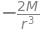

In [21]:
weyl[0,1,0,1]

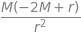

In [22]:
weyl[0,2,0,2]

(t, r, theta, phi, M)


Text(0.5, 1.0, 'T_01')

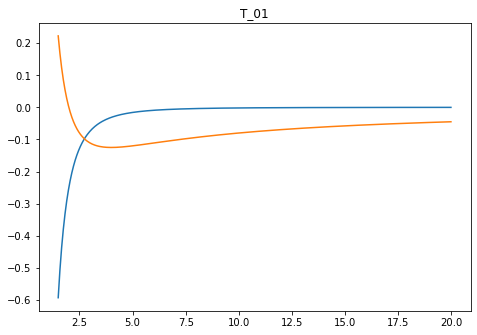

In [23]:
###Plot something
# first make the tensor into a function, printing 
args, func = weyl.tensor_lambdify()
print(args) # these are the argument values 

#Make x values - which we will sub in for r 
x = np.arange(1.5, 20.0, 0.04)
func(0.5,x,0, 0, 1)[0][1][0][1]

# Call the functions
y = func(1.0,x,1, 1, 1)[0][1][0][1]
z = -func(1.0,x,1, 1, 1)[0][2][0][2] # 0.1 to bring scale in
fig=plt.figure()
ax=fig.add_axes([0,2,1.0,1.0])
ax.plot(x,y)
ax.plot(x,z)
ax.set_title("T_01")


